# **Punto 2 (parte 2)**

# **Single-Cell pertubations**

### Análisis exploratorio de datos

##### **Resumen**

La comprensión de cómo se expresan los genes y cómo la estructura del ADN afecta esa expresión es fundamental para descubrir cómo funcionan los procesos en los cuerpos humanos y para entender los mecanismos biológicos detrás de diversos problemas de salud y enfermedades. La ciencia está en constante avance, y es crucial combinar las herramientas que nos proporciona para obtener mejores resultados en la investigación y el conocimiento sobre la regulación genética y la función celular. Esto puede ayudarnos a lograr diagnósticos más precisos y tratamientos más efectivos.

#### **En que consiste**

El análisis se enfoca en un conjunto de datos que consta de 9 datasets, cada uno con contenido diferente y destinado a distintos propósitos. Se centra en un conjunto de datos que incluye mediciones de expresión génica y accesibilidad a la cromatina. La integración de estos tipos de datos nos permite explorar cómo la estructura del ADN influye en la expresión de los genes y en diversas características que podemos identificar.

#### **Fuente de los datos**

Los datos fueron obtenidos de una plataforma de investigación genómica, donde se recopilan y procesan datos mutiómicos de diversas muestras biológicas. Estos datos proporcionados, ayudan a los investigadores a estudiar la complejidad de la regulación genética en diferentes contextos. Por otro lado, fueron descargados desde la plataforma web *Kaggle*.

#### **Procedimiento del experimento**

Se utilizaron células mononucleares de sangre periférica de donantes en placas de 96 pocillos, con controles positivos y negativos. Se asignaron 72 compuestos a los pocillos restantes.
Cada pocillo contiene diferentes tipos de células, y se mide la expresión genética en aproximadamente 350 células.
Por último, para calcular la expresión diferencial, se promedian los recuentos de expresión genética por tipo celular y se ajusta un modelo lineal, considerando factores técnicos como la biblioteca, la placa y el donante.

# Análisis Descriptivo de los Datos

Como se dijo anteriormente, el problema propuesto, cuenta con 9 dataset que analizaremos y observaremos para obtener información detallada sobre ellos.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pypalettes import load_cmap
from matplotlib.colors import ListedColormap
import numpy as np
import warnings
import squarify
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore", category=FutureWarning)


### detrain (dataset)

Este dataset contiene datos de expresión diferencial (proceso donde se activan diferentes genes en una célula), estas indican los cambios en la expresión de los genes luego de tratar las células con diferentes compuestos.

cargamos el dataset con la ayuda de la libreria `pandas`, para leer el archivo parquet.

In [3]:
detrain = pd.read_parquet(r'C:\Users\Usuario\Downloads\open-problems-single-cell-perturbations\de_train.parquet')

In [3]:
detrain.head()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629


In [4]:
detrain.shape

(614, 18216)

La base de datos `detrain` cuenta con 614 filas y 18,216 columnas.

Además, cuenta con diferentes variables, A continuación, mostraremos el tipo de cada una de ellas.

In [5]:
detrain.dtypes

cell_type       object
sm_name         object
sm_lincs_id     object
SMILES          object
control           bool
                ...   
ZXDB           float64
ZXDC           float64
ZYG11B         float64
ZYX            float64
ZZEF1          float64
Length: 18216, dtype: object

Podemos observar, que **cell_type**, **sm_name**, **sm_lincs_id**, **SMILES**, son variables categóricas, **control** es un booleano, y el resto de variables del dataset son numéricas, que corresponden a los genes de nuestro interés.

In [6]:
detrain.describe()

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.366769,0.250951,0.148259,0.155733,0.684275,0.946273,0.000582,0.348203,0.009424,0.062662,...,0.071179,0.159252,0.018584,0.267114,0.497043,0.382672,0.240726,0.161087,-0.160735,-0.071255
std,1.634697,1.188660,2.275410,2.184095,3.189206,3.826391,0.703410,1.259422,0.952243,1.237806,...,1.028842,1.128245,1.333236,1.439952,1.691722,1.430553,0.918039,0.779918,0.932961,0.748377
min,-3.258689,-4.067518,-28.552191,-17.801989,-6.378904,-6.908058,-3.167504,-2.825505,-3.654218,-8.042101,...,-4.309438,-4.276411,-21.273505,-5.520507,-6.780020,-2.617712,-8.310726,-3.456731,-7.189487,-4.819105
25%,-0.215161,-0.267728,-0.230129,-0.229460,-0.190989,-0.123963,-0.261792,-0.197019,-0.356774,-0.214164,...,-0.349490,-0.289498,-0.421265,-0.275030,-0.119912,-0.135779,-0.141982,-0.169364,-0.479099,-0.402733
50%,0.082722,0.102076,0.044717,0.036156,0.116411,0.131515,0.009045,0.144223,-0.028306,0.068134,...,0.010186,0.063539,-0.010158,0.065780,0.148876,0.145279,0.137559,0.062804,-0.083260,-0.058601
75%,0.528015,0.523162,0.405858,0.532216,0.616725,0.580870,0.268029,0.560221,0.253911,0.413308,...,0.330117,0.479763,0.361876,0.482989,0.683587,0.600652,0.510566,0.487592,0.266170,0.252387
max,22.085428,14.421991,27.557166,27.603715,35.278040,34.785942,5.079223,15.589494,10.855080,6.518868,...,10.803264,15.959706,10.649018,17.231287,23.721492,23.089832,10.844942,4.822008,7.826692,3.534737


Luego de efectuar el código anterior, podemos decir que **no hay datos faltantes** en los genes de estudio, ya que, todos cuentan con 614 observaciónes, que es el tamaño de las filas del dataset.

De este dataset podemos analizar la variable `control` que nos indica si esta instancia fue utilizada como control o no.

In [7]:
controlnum = detrain['control'].value_counts()
print(controlnum)

control
False    602
True      12
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7764\2955761791.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x="control", data=detrain, palette=cmap.colors)


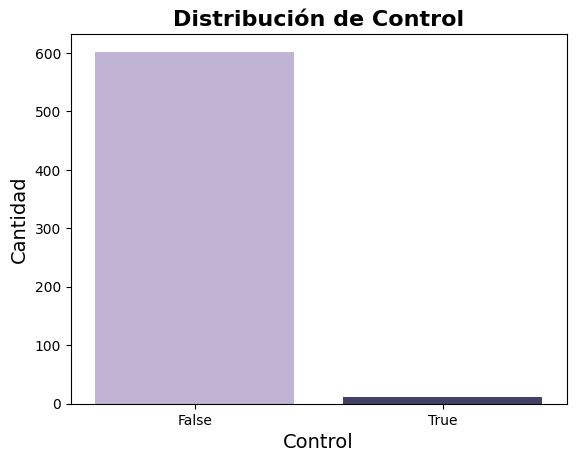

In [8]:
cmap = load_cmap('Amethyst')
sns.countplot(x="control", data=detrain, palette=cmap.colors)
plt.title("Distribución de Control", fontsize=16, fontweight='bold')
plt.xlabel("Control", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.show()

Realizamos diagramas de cajas y bigotes para conocer la distribución y más información acerca de los genes, debido a que contamos con más de 18mil genes, decidimos graficar solo una parte para una mejor visualización de ellos.


In [4]:

genes_x = detrain.iloc[:, 5:] 

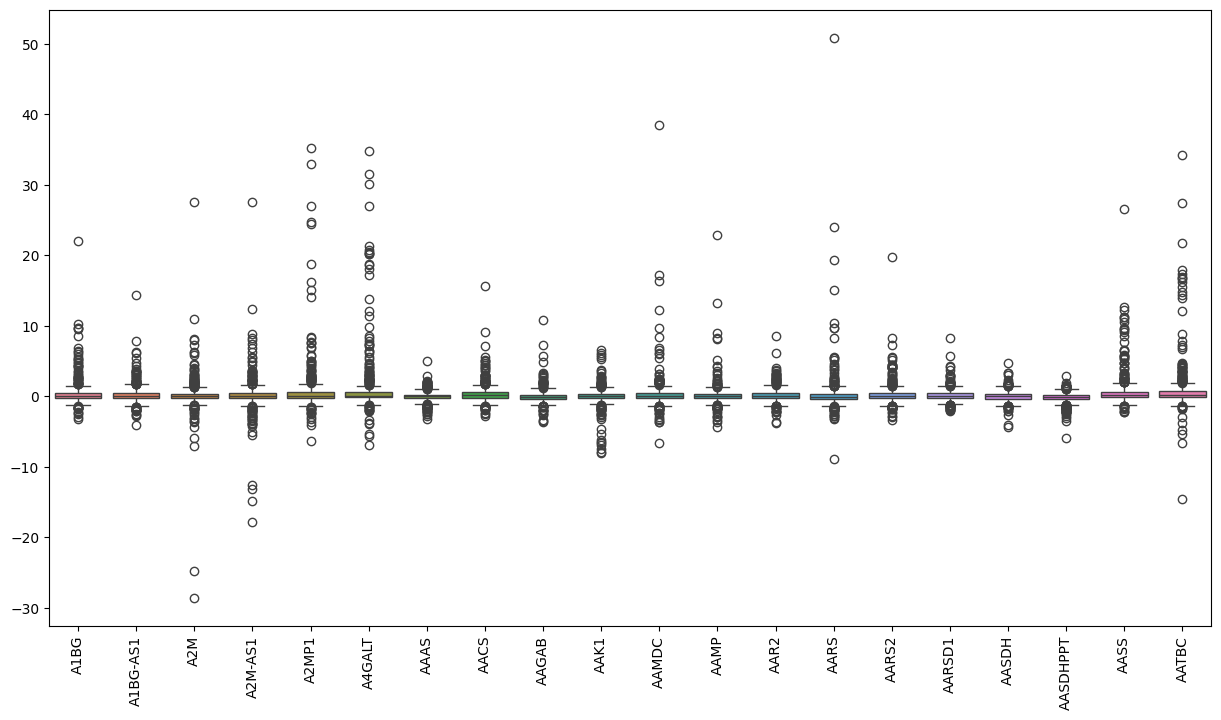

In [12]:
# Seleccionar las primeras 20 columnas del DataFrame
df_subset = genes_x.iloc[:, :20]

# Crear el boxplot
plt.figure(figsize=(15, 8))  # Ajusta el tamaño del gráfico si es necesario
sns.boxplot(data=df_subset)

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar los nombres de las variables si es necesario
plt.show()

Podemos inferir que la mayoria de genes cuentan con datos atípicos, y la mayoria de los valores oscilan entre -10 y 30.

### adatatrain (dataset)

In [22]:
adatatrain = pd.read_parquet(r'C:\Users\Usuario\Downloads\open-problems-single-cell-perturbations\adata_train.parquet')

In [10]:
adatatrain.shape

(416442312, 4)

La base de datos `adatatrain` contiente un total de 416'442.312 filas y 4 columnas.

In [11]:
adatatrain.head()

,obs_id,gene,count,normalized_count
0,000006a87ba75b72,AATF,1,5.567933
1,000006a87ba75b72,ABHD12,1,5.567933
2,000006a87ba75b72,ABHD3,1,5.567933
3,000006a87ba75b72,AC004687.1,1,5.567933
4,000006a87ba75b72,AC009779.2,1,5.567933


In [12]:
adatatrain.dtypes

obs_id               object
gene                 object
count                uint16
normalized_count    float32
dtype: object

Está compuesta por 4 variables, **obs_id,** **gene**, son categóricas, mientras que **count** y **normalized_count** son numéricas.

In [13]:
adatatrain.describe()

,count,normalized_count
count,4.164423e+08,4.164423e+08
mean,3.548138e+00,5.518731e+00
std,1.497948e+01,9.743412e-01
min,1.000000e+00,3.536117e+00
25%,1.000000e+00,5.041668e+00
50%,1.000000e+00,5.344550e+00
75%,2.000000e+00,5.825185e+00
max,1.471000e+04,1.350578e+01


### adataobsmeta (dataset)

In [5]:
adataobsmeta = pd.read_csv(r'C:\Users\Usuario\Downloads\open-problems-single-cell-perturbations\adata_obs_meta.csv')

Esta base de datos nos comparte más información técnica del experimento realizado.

In [15]:
adataobsmeta.head()

,obs_id,library_id,plate_name,well,row,col,cell_id,donor_id,cell_type,sm_lincs_id,sm_name,SMILES,dose_uM,timepoint_hr,control
0,000006a87ba75b72,library_4,plate_4,F7,F,7,PBMC,donor_2,T cells CD4+,LSM-4944,MLN 2238,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,1.0,24,False
1,0000233976e3cd37,library_0,plate_3,D4,D,4,PBMC,donor_1,T cells CD4+,LSM-46203,BMS-265246,CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)cnc2[nH]ncc12,1.0,24,False
2,0001533c5e876362,library_2,plate_0,B11,B,11,PBMC,donor_0,T regulatory cells,LSM-45663,Resminostat,CN(C)Cc1ccc(S(=O)(=O)n2ccc(/C=C/C(=O)NO)c2)cc1,1.0,24,False
3,00022f989630d14b,library_35,plate_2,E6,E,6,PBMC,donor_0,T cells CD4+,LSM-43216,FK 866,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,1.0,24,False
4,0002560bd38ce03e,library_22,plate_4,B6,B,6,PBMC,donor_2,T cells CD4+,LSM-1099,Nilotinib,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,1.0,24,False


In [16]:
adataobsmeta.shape

(240090, 15)

In [17]:
adataobsmeta.dtypes

obs_id           object
library_id       object
plate_name       object
well             object
row              object
col               int64
cell_id          object
donor_id         object
cell_type        object
sm_lincs_id      object
sm_name          object
SMILES           object
dose_uM         float64
timepoint_hr      int64
control            bool
dtype: object

`adataobsmeta` cuenta con 240090 filas y 15 columnas, además, cuenta con diferentes variables, de las cuales 11 son categóricas, 3 son numéricas y 1 es booleana. Esta base de datos contiene información sobre las células y compuestos experimentales, esta información está en la variable **cell_id**.

In [18]:
adataobsmeta.describe()

,col,dose_uM,timepoint_hr
count,240090.00000,240090.000000,240090.0
mean,6.05665,2.462781,24.0
std,3.55246,4.276144,0.0
min,1.00000,0.100000,24.0
25%,3.00000,1.000000,24.0
50%,6.00000,1.000000,24.0
75%,9.00000,1.000000,24.0
max,12.00000,14.100000,24.0


`sm_name` corresponde al nombre principal del compuesto principal en una forma estandarizada.

In [5]:
smcount = adataobsmeta['sm_name'].value_counts()
print(smcount)

sm_name
Dimethyl Sulfoxide     28462
Dabrafenib             26346
Belinostat             24059
LDN 193189              1939
Porcn Inhibitor III     1900
                       ...  
ABT737                   655
BMS-387032               416
UNII-BXU45ZH6LI          307
CGP 60474                 89
Alvocidib                 51
Name: count, Length: 147, dtype: int64


`donor_id` sirve para identificar la fuente del donotante de la muestra.

In [19]:
donorcount = adataobsmeta['donor_id'].value_counts()
print(donorcount)

donor_id
donor_2    84442
donor_1    81550
donor_0    74098
Name: count, dtype: int64


`plate_name` es un elemento que se utiliza para la organización e identificación de los datos del experimento.

In [20]:
platenamecount = adataobsmeta['plate_name'].value_counts()
print(platenamecount)

plate_name
plate_4    44550
plate_3    41881
plate_1    39892
plate_5    39669
plate_2    37914
plate_0    36184
Name: count, dtype: int64


`cell_type` contiene las células de interés para este experimentos y sus tipos.

In [21]:
celltypecount = adataobsmeta['cell_type'].value_counts()
print(celltypecount)

cell_type
T cells CD4+          124971
NK cells               59170
Myeloid cells          16661
T cells CD8+           15563
B cells                15485
T regulatory cells      8240
Name: count, dtype: int64


A continuación, se muestran diferentes graficas para entender visualmente los contenidos de esta base de datos.

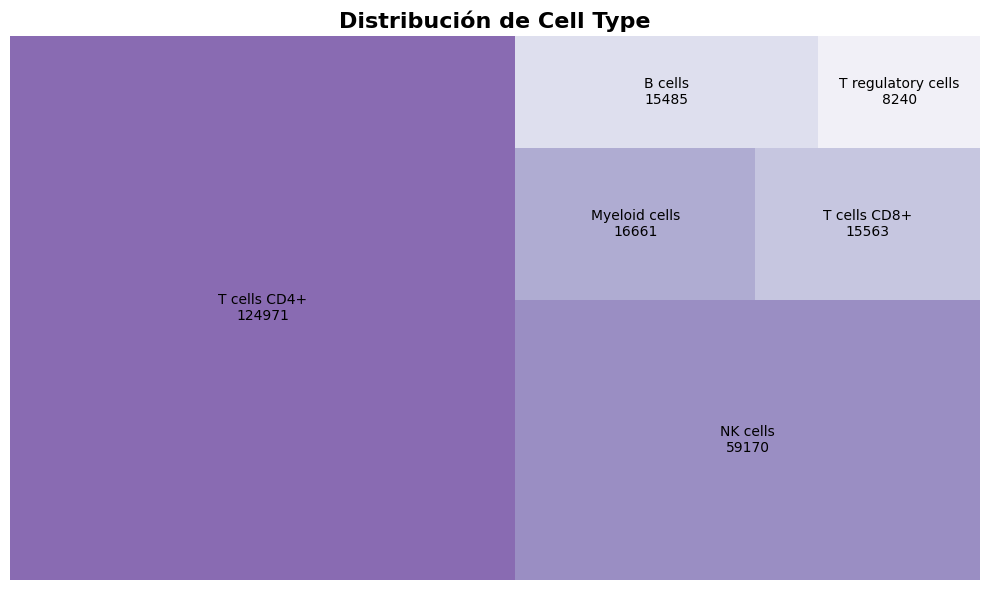

In [22]:
cell_counts = adataobsmeta['cell_type'].value_counts()
values = cell_counts.values
labels = [f'{cell}\n{count}' for cell, count in zip(cell_counts.index, cell_counts.values)]
colors = sns.color_palette("Purples_r", len(values))
plt.figure(figsize=(10, 6))
squarify.plot(sizes=values, label=labels, color=colors, alpha=0.7)
plt.axis("off")
plt.title("Distribución de Cell Type", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


De la gráfica anterior podemos concluir que la célula `T cell CD4 +` es la que cuenta con más observaciones, con un total de **124.971**. Mientras que, `T regulatory cell` es la que cuenta con menos observaciones.

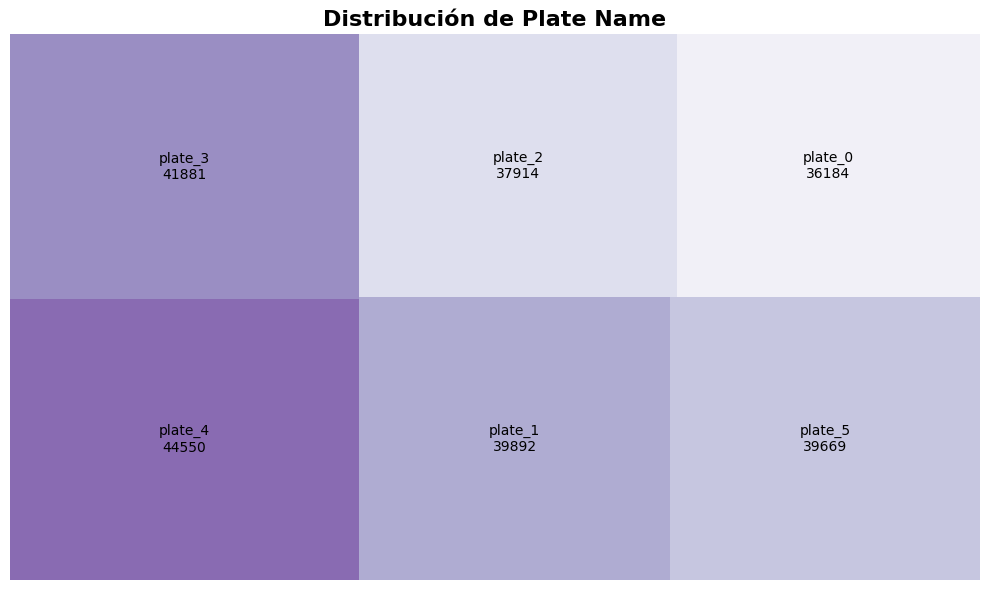

In [23]:
plate_counts = adataobsmeta['plate_name'].value_counts()
values = plate_counts.values
labels = [f'{plate}\n{count}' for plate, count in zip(plate_counts.index, plate_counts.values)]


colors = sns.color_palette("Purples_r", len(values))

plt.figure(figsize=(10, 6))
squarify.plot(sizes=values, label=labels, color=colors, alpha=0.7)
plt.axis("off")
plt.title("Distribución de Plate Name", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


`library_id` proporciona información sobre un indentificador único para cada biblioteca, que se refiere a una medición realizada en muestras agrupadas de cada fila de la placa, esto permite distinguir entre las diferentes bibliotecas en los experimentos.

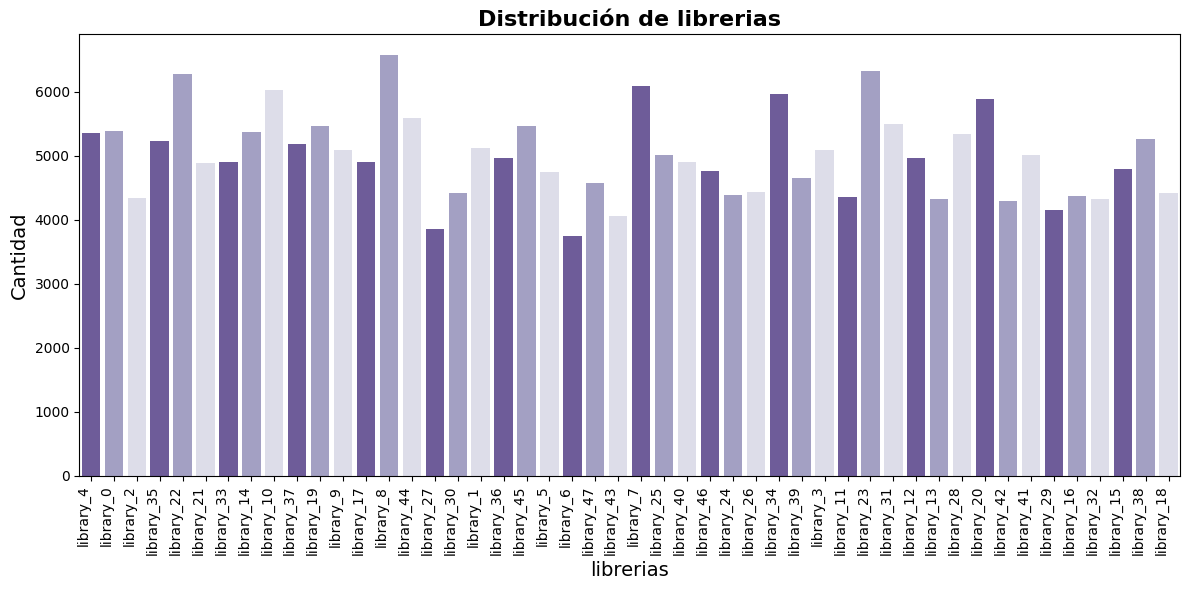

In [6]:
cmap = ListedColormap(sns.color_palette("Purples_r", 3))
plt.figure(figsize=(12, 6))
sns.countplot(x="library_id", data=adataobsmeta, palette=cmap.colors)
plt.title("Distribución de librerias", fontsize=16, fontweight='bold')
plt.xlabel("librerias", fontsize=14)
plt.ylabel("Cantidad", fontsize=14) 
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()
plt.show()

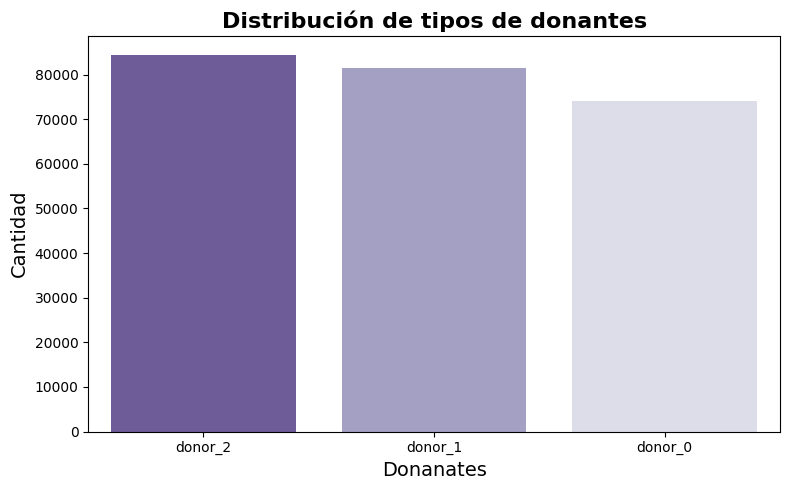

In [24]:
cmap = ListedColormap(sns.color_palette("Purples_r", 3))
plt.figure(figsize=(8, 5))
sns.countplot(x="donor_id", data=adataobsmeta, palette=cmap.colors)
plt.title("Distribución de tipos de donantes", fontsize=16, fontweight='bold')
plt.xlabel("Donanates", fontsize=14)
plt.ylabel("Cantidad", fontsize=14) 
plt.tight_layout()
plt.show()


Podemos observar de la gráfica anterior que `donor_2` cuenta con mayor observaciones (84442), mientras que `donor_0` cuenta es el donante con menor número de observaciones (74098).

### multiomevarmeta (dataset)

In [30]:
multiomevarmeta = pd.read_csv(r'C:\Users\Usuario\Downloads\open-problems-single-cell-perturbations\multiome_var_meta.csv')

In [26]:
multiomevarmeta.describe()

,location,gene_id,feature_type,genome,interval
count,158205,158205,158205,158205,158192
unique,158205,158205,2,1,158190
top,A1BG,ENSG00000121410,Peaks,GRCh38,chr21:34073577-34073578
freq,1,1,135418,158205,2


In [27]:
multiomevarmeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158205 entries, 0 to 158204
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   location      158205 non-null  object
 1   gene_id       158205 non-null  object
 2   feature_type  158205 non-null  object
 3   genome        158205 non-null  object
 4   interval      158192 non-null  object
dtypes: object(5)
memory usage: 6.0+ MB


En este dataset contamos con solo variables categóricas. Este dataset, contiene más información acerca de las características de los genes.

La variable `feature_type` contiene si la característica es una medición de la expresión de ARN (Gene expression) o una medición de accesibilidad a la cromatica (Peaks). Esto es esencial para diferenciar entre los tipos de datos del análisis.

In [28]:
featuarecount = multiomevarmeta['feature_type'].value_counts()
print(featuarecount)

feature_type
Peaks              135418
Gene Expression     22787
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7764\3159184358.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x="feature_type", data=multiomevarmeta, palette=cmap.colors)


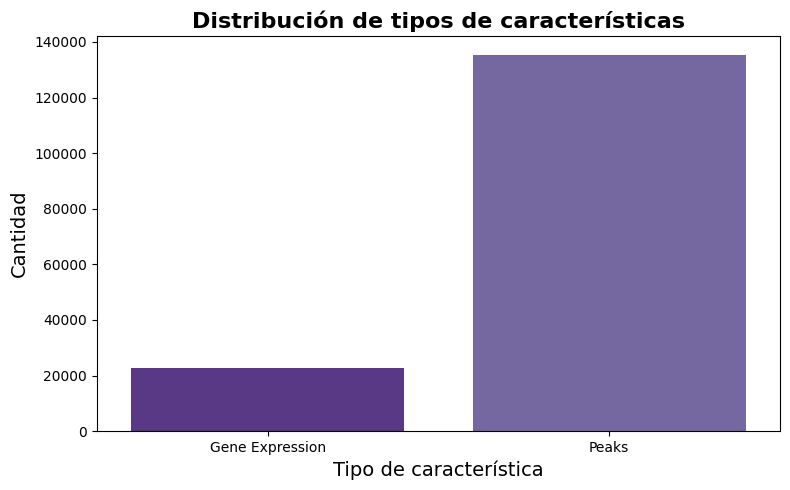

In [29]:
cmap = ListedColormap(sns.color_palette("Purples_r", 6))
plt.figure(figsize=(8, 5))
sns.countplot(x="feature_type", data=multiomevarmeta, palette=cmap.colors)
plt.title("Distribución de tipos de características", fontsize=16, fontweight='bold')
plt.xlabel("Tipo de característica", fontsize=14)
plt.ylabel("Cantidad", fontsize=14) 
plt.tight_layout()
plt.show()

Podemos inferir que **Peaks** contiene 135,418 observaciones, lo que la convierte en la característica con el mayor número de observaciones, mientras que **Gene Expression** cuenta con 22,787 observaciones.

### multiometrain (dataset)

In [31]:
multiometrain = pd.read_parquet(r'C:\Users\Usuario\Downloads\open-problems-single-cell-perturbations\multiome_train.parquet')

In [31]:
multiometrain.shape

(216251368, 4)

`multiometrain` cuenta con 216'251.368 filas y 4 columnas.

In [32]:
multiometrain.describe()

,count,normalized_count
count,2.162514e+08,2.162514e+08
mean,2.312303e+00,2.291773e+00
std,2.993796e+00,2.107194e+00
min,1.000000e+00,4.198309e-02
25%,2.000000e+00,7.348657e-01
50%,2.000000e+00,1.316221e+00
75%,2.000000e+00,3.253358e+00
max,5.810000e+03,1.835729e+01


In [33]:
multiometrain.dtypes

obs_id               object
location             object
count                uint16
normalized_count    float32
dtype: object

La base de datos cuenta con 4 variables, 2 categóricas y 2 numéricas.

In [34]:
table = multiometrain['location'].value_counts()
print(table)

location
B2M            25521
MALAT1         25503
MT-CO1         25425
MT-ATP6        25416
MT-CO2         25402
               ...  
ZNF385D-AS2        9
PLA2G5             8
HOXA10-AS          8
SMIM24             6
GATA2              3
Name: count, Length: 158205, dtype: int64


### idmap (dataset)

In [33]:
idmap = pd.read_csv(r'C:\Users\Usuario\Downloads\open-problems-single-cell-perturbations\id_map.csv')

Esta base de datos contiene información sobre los pares de indentificadores que ayudan a vincular diferentes características o entidades en el análisis.

In [36]:
idmap.shape

(255, 3)

El dataset `idmap` cuenta con 255 filas y 3 columnas.

In [37]:
idmap.dtypes

id            int64
cell_type    object
sm_name      object
dtype: object

Las variables de este dataset las conforman 2 variables categóricas y 1 variable numérica.

In [38]:
idmap.describe()

,id
count,255.000000
mean,127.000000
std,73.756356
min,0.000000
25%,63.500000
50%,127.000000
75%,190.500000
max,254.000000


In [34]:
smnamecount = idmap['sm_name'].value_counts()
print(smnamecount)

sm_name
5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine    2
Lamivudine                                                              2
Raloxifene                                                              2
RVX-208                                                                 2
RN-486                                                                  2
                                                                       ..
Colforsin                                                               2
Colchicine                                                              2
BMS-387032                                                              1
CGP 60474                                                               1
CEP-18770 (Delanzomib)                                                  1
Name: count, Length: 129, dtype: int64


la variable `cell_type` sirve para identificar y clasificar los diferentes tipos de células presentes en el conjunto de datos.

In [39]:
table = idmap['cell_type'].value_counts()
print(table)

cell_type
B cells          128
Myeloid cells    127
Name: count, dtype: int64


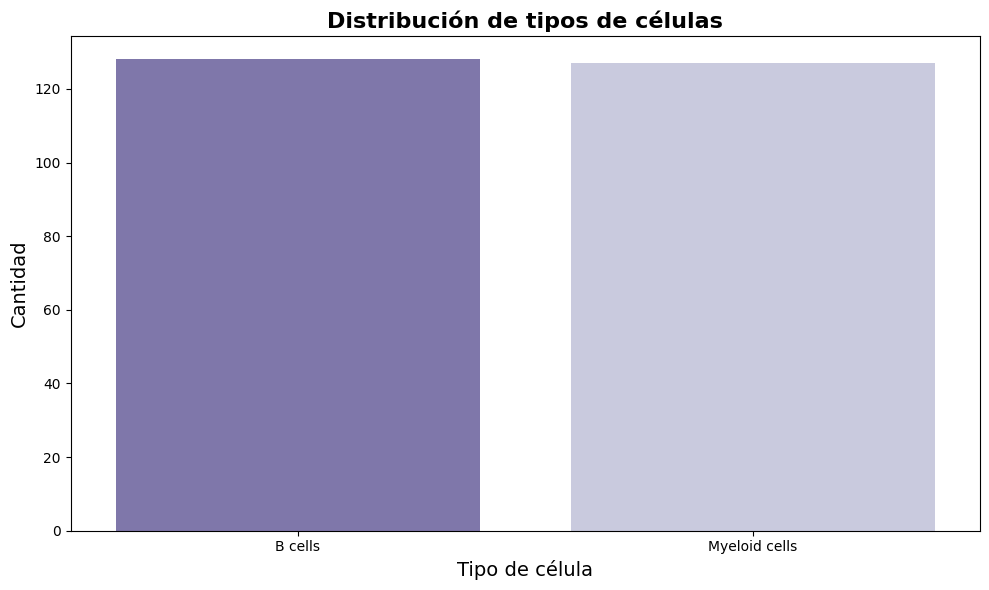

In [40]:
cmap = ListedColormap(sns.color_palette("Purples_r", 2))
plt.figure(figsize=(10, 6))
sns.countplot(x="cell_type", data=idmap, palette=cmap.colors)
plt.title("Distribución de tipos de células", fontsize=16, fontweight='bold')
plt.xlabel("Tipo de célula", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.tight_layout()
plt.show()

Podemos observar y concluir que ambas variables contienen un número muy similar de observaciones: **B cells** tiene 128 observaciones, mientras que **Myeloid cells** cuenta con 127.

## Análisis bivariado

In [36]:
genes_x

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0.104720,-0.077524,-1.625596,-0.144545,0.143555,0.073229,-0.016823,0.101717,-0.005153,1.043629,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,0.915953,-0.884380,0.371834,-0.081677,-0.498266,0.203559,0.604656,0.498592,-0.317184,0.375550,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,-0.387721,-0.305378,0.567777,0.303895,-0.022653,-0.480681,0.467144,-0.293205,-0.005098,0.214918,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,0.232893,0.129029,0.336897,0.486946,0.767661,0.718590,-0.162145,0.157206,-3.654218,-0.212402,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,4.290652,-0.063864,-0.017443,-0.541154,0.570982,2.022829,0.600011,1.231275,0.236739,0.338703,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,-0.544709,0.282458,-0.431359,-0.364961,0.043123,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,-0.455549,0.188181,0.595734,-0.100299,0.786192,0.090954,0.169523,0.428297,0.106553,0.435088,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,0.338168,-0.109079,0.270182,-0.436586,-0.069476,-0.061539,0.002818,-0.027167,-0.383696,0.226289,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,-0.706087,-0.620919,-1.485381,0.059303,-0.032584,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


En esta ocasión, realizamos una matriz de correlación para identificar de manera más profunda las variables que presentan correlación entre sí. Aunque analizaremos si sería necesario eliminar algunas de estas variables, en este caso no procederemos con su eliminación, ya que mantener todos los genes es fundamental para entrenar nuestros modelos. Sin embargo, como ejercicio práctico, visualizaremos la matriz de correlaciones para observar estos patrones.

In [5]:
correlation_matrix = genes_x.corr()
print(correlation_matrix)

              A1BG  A1BG-AS1       A2M   A2M-AS1     A2MP1    A4GALT  \
A1BG      1.000000  0.714458  0.457526  0.522942  0.778408  0.837132   
A1BG-AS1  0.714458  1.000000  0.301795  0.369418  0.577066  0.712535   
A2M       0.457526  0.301795  1.000000  0.614617  0.407135  0.350203   
A2M-AS1   0.522942  0.369418  0.614617  1.000000  0.625173  0.347183   
A2MP1     0.778408  0.577066  0.407135  0.625173  1.000000  0.741961   
...            ...       ...       ...       ...       ...       ...   
ZXDB      0.792222  0.697719  0.536887  0.547979  0.667382  0.750323   
ZXDC      0.515260  0.380695  0.599092  0.469065  0.398134  0.432041   
ZYG11B    0.282706  0.323991  0.234177  0.100440  0.126451  0.225936   
ZYX       0.064979  0.085938  0.054594  0.235550  0.130264  0.001245   
ZZEF1     0.149878  0.072710  0.214293  0.208293  0.141848  0.104180   

              AAAS      AACS     AAGAB      AAK1  ...      ZUP1      ZW10  \
A1BG      0.439837  0.705893  0.192259 -0.070669  ...  0.1

A continuación se eliminarán la variables que están correlacionadas en caso de que sea útil, pero para entrenar nuestro modelo, nos quedaremos con el dataset que contiene a todos los genes.

In [6]:
threshold = 0.7
mask = (correlation_matrix.abs() > threshold)

# Encontrar columnas a eliminar
to_drop = set()

for column in mask.columns:
    if column not in to_drop:
        correlated_columns = mask[column]
        if correlated_columns.sum() > 1: 
            to_drop.update(correlated_columns[correlated_columns].index)
cleaned_correlation_matrix = correlation_matrix.drop(columns=to_drop, axis=1).drop(index=to_drop, axis=0)
print(cleaned_correlation_matrix)


            AAAS     AAGAB      AAK1      AAR2    AARSD1     AASDH  AASDHPPT  \
AAAS    1.000000  0.145489 -0.040171  0.272952  0.314979  0.148464 -0.037022   
AAGAB   0.145489  1.000000  0.066934  0.148145  0.167898  0.040731  0.042383   
AAK1   -0.040171  0.066934  1.000000 -0.235955 -0.150587 -0.019211  0.160261   
AAR2    0.272952  0.148145 -0.235955  1.000000  0.506242  0.234962 -0.073885   
AARSD1  0.314979  0.167898 -0.150587  0.506242  1.000000  0.147204 -0.095603   
...          ...       ...       ...       ...       ...       ...       ...   
ZSWIM8  0.163369  0.424849  0.051757  0.289295  0.258193  0.153596 -0.042629   
ZUP1    0.145371  0.407756 -0.149111  0.168954  0.198811 -0.034254  0.019237   
ZYG11B  0.164784  0.217202  0.193395  0.172679  0.166717  0.145886  0.137706   
ZYX     0.083897 -0.060895  0.230573 -0.061867 -0.080782  0.054273 -0.050025   
ZZEF1   0.092692  0.044080  0.043768  0.171946  0.176072  0.132885  0.099511   

            AATF     ABCA5     ABCB7  .

In [11]:
variables_remaining = cleaned_correlation_matrix.columns
df_remaining_variables = pd.DataFrame(variables_remaining, columns=['Variables'])
filtered_genes= genes_x[variables_remaining]
filtered_genes


,AAAS,AAGAB,AAK1,AAR2,AARSD1,AASDH,AASDHPPT,AATF,ABCA5,ABCB7,...,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN32,ZSWIM7,ZSWIM8,ZUP1,ZYG11B,ZYX,ZZEF1
0,-0.016823,-0.005153,1.043629,0.088934,-0.126706,-2.670154,0.624403,0.514184,0.331059,-0.221918,...,-1.067981,0.924709,-0.562809,-0.931970,0.179530,0.220086,-0.227781,0.034127,0.221377,0.368755
1,0.604656,-0.317184,0.375550,0.188528,0.133680,-0.133070,-0.104862,0.119080,0.267578,0.450027,...,-0.178712,-0.605487,-0.019590,-0.052460,1.262570,0.357003,-0.494985,0.704780,1.096702,-0.869887
2,0.467144,-0.005098,0.214918,-2.242325,0.162589,-0.134455,0.089236,0.848633,0.558572,-0.714563,...,-0.032028,-0.002080,0.525158,0.303495,0.225485,0.131672,-0.119422,0.415768,0.078439,-0.259365
3,-0.162145,-3.654218,-0.212402,-0.262876,0.108755,0.032864,-0.688623,2.008549,0.049918,1.191746,...,0.289975,0.504879,0.163295,1.658680,-0.203936,2.060546,0.451679,-0.048233,0.216139,-0.085024
4,0.600011,0.236739,0.338703,-0.035923,1.179433,-0.898467,0.130078,-0.816469,0.801710,-0.256717,...,-0.329395,0.045852,-0.132945,-0.074826,-0.145054,0.965736,0.758474,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.282458,-0.364961,0.043123,-1.128044,-0.390320,-0.485878,-0.571904,-0.743107,-1.080498,-2.530061,...,-0.250088,-3.134873,-0.511368,1.111968,0.000051,-0.626368,-0.549987,0.105138,0.491015,-0.979951
610,0.169523,0.106553,0.435088,-1.115466,0.584750,-0.158582,-0.643390,-0.500306,0.445424,-0.607400,...,-0.832037,0.074903,0.386341,-0.153593,-0.538152,0.047483,-1.236905,-0.231642,1.023994,-0.064760
611,0.002818,-0.383696,0.226289,0.976024,1.835000,-0.206824,-0.752374,0.163126,0.134690,-0.460614,...,-0.714794,-0.166825,-0.434708,-0.605640,0.697416,0.225507,0.077579,-0.209077,0.389751,-0.337082
612,-0.620919,0.059303,-0.032584,-0.438237,0.240634,-0.144547,0.153796,0.150626,0.028250,-0.574156,...,-1.883349,1.139340,-0.087040,-1.157477,0.369929,0.625152,0.005951,-0.029684,0.005506,-1.733112


Además, realizaremos gráficas para ver de manera visual la correlación entre 2 tipos de genes que tenga correlación y analizaremmos dos genes que no la tengan.

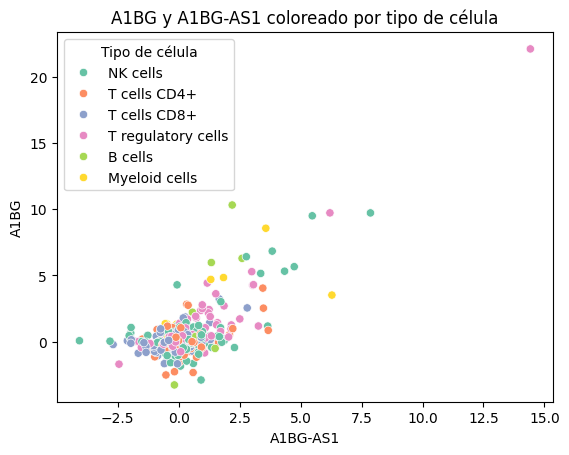

In [11]:
sns.scatterplot(x='A1BG-AS1', y='A1BG', hue='cell_type', data=detrain, palette='Set2')

plt.title('A1BG y A1BG-AS1 coloreado por tipo de célula')
plt.ylabel('A1BG')
plt.xlabel('A1BG-AS1')
plt.legend(title='Tipo de célula')
plt.show()


De la gráfica anterior podemos observar una una correlación positiva ya que cuando una de las variables aumenta, la otra también lo hace. Por otro lado, se puede ver los colores de las células que influyen en estos genes.

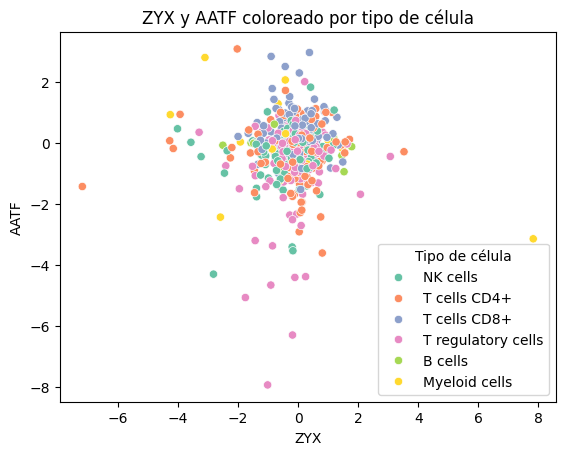

In [15]:
sns.scatterplot(x='ZYX', y='AATF', hue='cell_type', data=detrain, palette='Set2')

plt.title('ZYX y AATF coloreado por tipo de célula')
plt.xlabel('ZYX')
plt.ylabel('AATF')
plt.legend(title='Tipo de célula')
plt.show()

De la gráfica anterior podemos decir que no se observa una correlación clara, ya que ambas variables están concentradas en los mismos valores, por lo que se puede concluir que no hay correlación ni positiva ni negativa.